<a href="https://colab.research.google.com/github/nagelex/dataa/blob/main/Kopia_notatnika_Classes_02_Reading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The art of reading and searching

## Introduction to Padas Dataframes

A [Pandas](https://pandas.pydata.org) DataFrame is a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns.

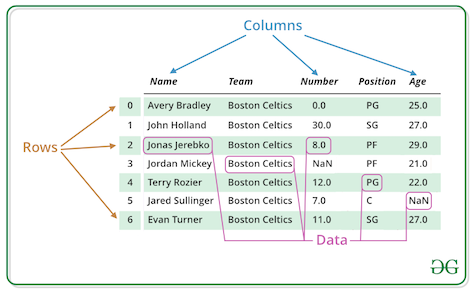

[Source](https://media.geeksforgeeks.org/wp-content/uploads/finallpandas.png)

In [1]:
# Import the pandas lib
import pandas as pd
import numpy as np

## Series

[`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) is a one-dimensional labeled array capable of holding any data
type (integers, strings, floating point numbers, Python objects, etc.). The axis
labels are collectively referred to as the **index**. The basic method to create a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) is to call:

> `s = pd.Series(data, index=index)`

Here, data can be many different things:

- a Python dict
- an ndarray
- a scalar value (like 5)

The passed index is a list of axis labels. Thus, this separates into a few cases depending on what data is:

#### From dict

In [ ]:
# create a dict of (key, value) values
d = {"b": 1, "a": 0, "c": 2}

In [ ]:
# create a pandas Series from dict
pd.Series(d)

b    1
a    0
c    2
dtype: int64

If an index is passed, the Series will be ordered accoring to the passed index:

In [ ]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}
pd.Series(d, index=["b", "c", "d", "a"])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

NaN (not a number) is the standard missing data marker used in pandas.

#### From ndarray

If `data` is an ndarray, index must be the same length as data. If no index is passed, one will be created having values `[0, ..., len(data) - 1]`.

In [ ]:
s = pd.Series(np.random.randn(5))
s

0   -0.278641
1    0.385850
2    0.387800
3   -1.530092
4   -0.459946
dtype: float64

In [ ]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a   -0.045076
b   -0.748424
c   -1.121624
d    0.396473
e   -0.628390
dtype: float64

#### From scalar value

If `data` is a scalar value, an index must be provided. The value will be repeated to match the length of **index**.

In [ ]:
v = pd.Series(5.0, index=["a", "b", "c", "d", "e"])
v

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

### Series is ndarray-like

`Series` acts very similarly to a `ndarray` and is a valid argument to most NumPy functions. However, **operations such as slicing will also slice the index**.


In [ ]:
s = pd.Series(np.random.randn(5))
s

0   -0.479272
1   -0.275110
2   -1.243190
3   -0.842242
4   -1.363208
dtype: float64

In [ ]:
s[0]

-0.47927164849783255

In [ ]:
s[:3]

0   -0.479272
1   -0.275110
2   -1.243190
dtype: float64

In [ ]:
# right way to slice specific sub-set of values based on indexes
s_subset = s[[4, 3, 1]]
s_subset

4   -1.363208
3   -0.842242
1   -0.275110
dtype: float64

In [ ]:
type(s_subset)

pandas.core.series.Series

In [ ]:
np.exp(s)

0    2.778187
1    0.245662
2    1.194789
3    1.960192
4    5.262938
dtype: float64

While `Series` is ndarray-like, if you need an actual `ndarray`, then use `Series.to_numpy()`.

In [ ]:
s.to_numpy()

array([ 1.02179866, -1.40380036,  0.17796918,  0.67304255,  1.66068934])

### Series is dict-like

A `Series` is also like a fixed-size dict in that you can get and set values by index label:

In [ ]:
s = pd.Series(np.random.randn(5), index = ["a", "b", "c", "d", "e"])
s

a    1.827087
b   -1.051138
c    0.032553
d    0.308160
e    0.012752
dtype: float64

In [ ]:
s["a"]

1.8270874141411688

In [ ]:
s["e"] = 12.0
s

a     1.827087
b    -1.051138
c     0.032553
d     0.308160
e    12.000000
dtype: float64

In [ ]:
"e" in s

True

In [ ]:
"f" in s

False

In [ ]:
# If a label is not contained in the index, an exception is raised:
s["f"]

KeyError: ignored

## DataFrame

[`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or a dict of Series objects. It is generally the most commonly used pandas object.

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

## Object creation


### From dict of Series or dicts

In [ ]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

In [ ]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


### From dict of ndarrays / lists

The ndarrays must all be the same length. If an index is passed, it must also be the same length as the arrays. If no index is passed, the result will be `range(n)`, where n is the array length.

In [ ]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
d

{'one': [1.0, 2.0, 3.0, 4.0], 'two': [4.0, 3.0, 2.0, 1.0]}

In [ ]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


### From dict of Objects

In [ ]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

Use `DataFrame.head()` and `DataFrame.tail()` to view the top and bottom rows of the frame respectively:

In [ ]:
df = pd.DataFrame(np.random.randn(20, 4), columns=list("ABCD"))
display(df)

,A,B,C,D
0,-0.623518,-0.561141,-0.066365,0.156706
1,1.316472,-0.773574,0.078845,-0.273880
2,-1.084033,1.031475,-0.537551,-1.166295
3,1.231067,1.462898,-0.335059,0.626546
4,1.033114,-0.436252,-0.700320,-0.701896
5,-1.752085,-0.032871,0.254194,-0.858461
6,-1.021248,1.292347,0.979224,1.474253
7,1.044666,-0.325947,1.527620,0.095570
8,-0.472863,1.571009,-1.529514,-0.051858
9,0.254334,0.613368,-0.273751,-1.052099


In [ ]:
# view few records from top
df.head()

,A,B,C,D
0,-0.623518,-0.561141,-0.066365,0.156706
1,1.316472,-0.773574,0.078845,-0.273880
2,-1.084033,1.031475,-0.537551,-1.166295
3,1.231067,1.462898,-0.335059,0.626546
4,1.033114,-0.436252,-0.700320,-0.701896


In [ ]:
# view few records from bottom
df.tail()

,A,B,C,D
15,0.119245,1.143929,1.213281,-1.314664
16,0.443126,1.557518,-0.803012,-1.770432
17,-0.332999,-0.951411,-2.020966,0.576287
18,-1.221128,0.950297,-0.612636,0.640575
19,2.821508,-0.060805,1.875486,-0.295914


`DataFrame.to_numpy()` gives a NumPy representation of the underlying data.

In [ ]:
# gives 2D np array
list_ = df.to_numpy()
print(list_.shape)
list_

(20, 4)


array([[-0.62351772, -0.56114065, -0.06636503,  0.15670576],
       [ 1.31647174, -0.77357422,  0.07884532, -0.27387955],
       [-1.08403285,  1.03147526, -0.53755077, -1.16629486],
       [ 1.23106679,  1.46289798, -0.33505875,  0.62654649],
       [ 1.03311428, -0.43625198, -0.70031966, -0.70189598],
       [-1.75208501, -0.03287133,  0.25419363, -0.85846051],
       [-1.02124817,  1.29234679,  0.97922444,  1.47425337],
       [ 1.04466553, -0.32594656,  1.52762037,  0.09557039],
       [-0.47286345,  1.57100938, -1.5295143 , -0.05185767],
       [ 0.25433422,  0.61336849, -0.27375088, -1.05209877],
       [ 1.46132091, -0.893045  , -0.46710152, -1.45287962],
       [ 1.0723811 , -2.06748854, -0.25808655, -1.27824463],
       [-0.23044606,  1.64957835, -0.24592189, -0.52356534],
       [-0.25331934, -0.58201829, -0.55358545, -1.12603063],
       [ 0.54057428,  0.60595785,  1.65296242, -1.11727629],
       [ 0.11924471,  1.14392885,  1.2132813 , -1.31466389],
       [ 0.44312564,  1.

## Excercise 1:
There is a series of short excercises before you. Do as much as possible in 20 mins. Good luck!

In [ ]:
"""
1. Fix the code below:
"""

indexes = np.arange(0,20)
df = pd.DataFrame(np.random.randn(20, 4), index=indexes, columns=list("ABCD"))
df

,A,B,C,D
0,2.819373,-0.684208,-0.174390,0.649570
1,0.689328,-2.392104,0.002859,-0.205394
2,-0.294651,-1.532862,-2.008465,0.516408
3,-1.578688,-0.410181,0.795325,1.102897
4,-0.845568,0.755488,-0.873392,-0.567034
5,-0.060077,1.480135,2.102127,-0.080519
6,-0.101868,-0.164965,0.799153,1.143475
7,0.767645,0.256546,1.178484,-0.768105
8,-0.045544,1.003313,0.273134,1.947782
9,1.531938,0.506166,-0.737186,-0.536773


In [ ]:
"""
2. Fix the code below:
"""

df = pd.DataFrame(np.random.randn(20, 4), columns=list("ABCD"))
df

,A,B,C,D
0,0.673534,1.150678,1.648545,-1.898797
1,0.964049,0.351541,0.890269,-0.267138
2,1.609636,-0.829282,-0.894905,-1.784503
3,-0.243104,0.431672,0.799230,-0.054977
4,-1.265001,-0.666261,-0.775849,-0.353455
5,-0.410264,-0.998880,-1.696784,0.619972
6,-0.755857,-1.923388,1.086059,-0.025308
7,-0.626559,2.550811,1.504955,-0.757694
8,-0.779043,-0.275608,0.100072,0.331649
9,0.991630,0.022838,-0.034640,2.369800


In [ ]:
"""
3. Fix the code below:
"""
indexes = np.arange(0,4)
df = pd.DataFrame({
    'A': 'tony',
    'B': 'best',
    'C': 'unicorn',
}, index =indexes)
df

,A,B,C
0,tony,best,unicorn
1,tony,best,unicorn
2,tony,best,unicorn
3,tony,best,unicorn


In [ ]:
"""
4. Fix the code below:

"""
indexes = np.arange(0,4)
df = pd.DataFrame(np.random.randn(4, 4), index=indexes, columns=list("ABCD"))
df[['A','B']] # selects columns A,B, and from df

,A,B
0,0.484153,-0.433311
1,1.012264,-0.842388
2,1.319917,-0.303548
3,-0.341519,-0.589815


In [ ]:
"""
5. Fix the code below:
"""
df = pd.DataFrame(np.random.randn(20, 4), columns=list("ABCD"))
display(df)

first_element_of_a_column = df['A'].iloc[0]

if first_element_of_a_column > 0:
  print('yup!')


,A,B,C,D
0,1.050292,0.140542,0.741696,0.439914
1,2.341212,1.133314,-2.309085,-1.011399
2,0.046567,0.193062,-1.004708,0.595778
3,0.753598,-0.951071,0.877725,0.176700
4,1.041641,0.570122,-0.920461,0.822605
5,0.103241,1.007412,-1.582541,-1.487357
6,-1.113982,1.704151,-1.344759,-0.476224
7,0.738263,0.002586,-0.565265,0.426300
8,-1.631301,-0.954987,-0.127835,-0.038159
9,-1.783475,1.114561,-0.600531,-0.171881


yup!


In [ ]:
"""
6. Fix the code below:
"""
df = pd.DataFrame(np.random.randn(4, 4), index=indexes, columns=list("ABCD"))
df.iloc[:3]
# selects first three rows from df

,A,B,C,D
0,0.439399,1.014814,-1.057733,-0.418962
1,0.907059,-0.381830,0.994759,-0.396518
2,-1.538898,-0.101171,-0.343206,0.998337


In [ ]:
"""
7. Fix the code below:
"""
df = pd.DataFrame(np.random.randn(4, 4), index=indexes, columns=list("ABCD"))
df.iloc[:,[0,1,2]] # selects first three columns from df

,A,B,C
0,-0.459518,-1.163431,0.300011
1,1.007835,0.582687,0.003276
2,1.917898,-0.220573,-0.330539
3,0.343564,0.643690,-0.168138


In [ ]:
"""
8. Fix the code below:
"""

df = pd.DataFrame(np.random.randn(20, 4), columns=list("ABCD"))
display(df)

display(df[df["A"] > 0.5]) # displays subset of df where colum A is greater than 0.5

df[df["A"] > 0.5].loc[:,["B", "D"]] # selects subset of df where colum A is greater than 0.5 and then gets only colums B and D

,A,B,C,D
0,-1.208447,-0.584631,0.527500,1.462102
1,0.835987,0.340697,1.555112,-0.984274
2,0.051515,-0.096639,-0.023680,-1.140633
3,1.277637,-0.125973,-1.150106,-0.960812
4,-0.324512,-0.085306,-0.508243,-1.108262
5,-0.278182,-1.285279,0.384651,0.515221
6,0.072815,-0.725610,0.460921,1.350533
7,0.129268,-0.762704,-1.452729,-0.177872
8,-0.117191,1.405927,-0.315761,-1.583151
9,-1.575961,-0.292428,-0.590863,0.004679


,A,B,C,D
1,0.835987,0.340697,1.555112,-0.984274
3,1.277637,-0.125973,-1.150106,-0.960812
13,0.785454,-0.413530,0.394975,-0.494329
15,1.631299,0.749091,0.107893,-0.051165
16,0.790420,-0.042256,0.485383,-1.408320


,B,D
1,0.340697,-0.984274
3,-0.125973,-0.960812
13,-0.413530,-0.494329
15,0.749091,-0.051165
16,-0.042256,-1.408320


In [ ]:
"""
9. Fix the code below:
"""
import random

df = pd.DataFrame({
    'response_time': np.random.rand(50),
    'ID': random.sample(range(100), 50)
})
display(df)

df_sorted_by_ID = df.sort_values('ID')
display(df_sorted_by_ID)

,response_time,ID
0,0.787648,34
1,0.122133,97
2,0.115444,55
3,0.260812,82
4,0.927814,59
5,0.282489,32
6,0.093081,93
7,0.838586,74
8,0.377442,0
9,0.718042,33


,response_time,ID
8,0.377442,0
28,0.460189,3
41,0.570930,4
29,0.770876,6
20,0.608483,9
25,0.363732,12
39,0.301960,13
45,0.466871,15
48,0.917641,18
42,0.090549,23


---
So far, you have been fixing the obvious errors. In the following exercises, you will have to combine your knowledge and tools to complete the task.

In [ ]:
# generate data ############
size = 100
ids = np.array(random.sample(range(200), size))
gender = np.random.choice([0, 1], size=size)
anxiety = np.zeros(size)

anxiety[gender == 0] = np.random.normal(loc=20, scale=2, size=np.sum(gender == 0))
anxiety[gender == 1] = np.random.normal(loc=18, scale=3, size=np.sum(gender == 1))
response_time = anxiety*0.4 + np.random.normal(loc=0.0, scale=2.0, size=size)

indexes = np.random.permutation(size)
############################

In [ ]:
"""
10. Fix the logic of the code below.

HINT: Think about df indexes or different merging method.
"""

df_RT = pd.DataFrame({
    'response_time': response_time,
    'ID': ids
})

df_anxiety = pd.DataFrame({
    'anxiety': anxiety[indexes],
    'gender': gender[indexes],
    'ID': ids[indexes]
})

df_RT_anxiety = pd.concat([df_RT, df_anxiety], axis = 1)
display(df_RT_anxiety)

,response_time,ID,anxiety,gender,ID
0,9.395796,189,15.341202,1,20
1,5.377011,174,20.717872,0,26
2,8.370524,92,22.272138,1,105
3,9.548410,20,18.563335,0,140
4,6.993245,121,21.325174,1,130
...,...,...,...,...,...
95,7.919489,84,15.582939,0,146
96,8.924348,149,17.487914,1,135
97,5.499873,171,17.733525,0,34
98,8.260419,91,16.271700,1,134


In [ ]:
"""
11. See the graph below. It displays the relation between anxiety and the
response times from the (correctly created) df_RT_anxiety. Now - change the
graph this way to get a separate dots for the two genders
(like the graph in the cell below).

HINT: see docs of seaborn scatterplot method.
"""
import seaborn as sns

sns.scatterplot(df_RT_anxiety, x='anxiety', y='response_time')

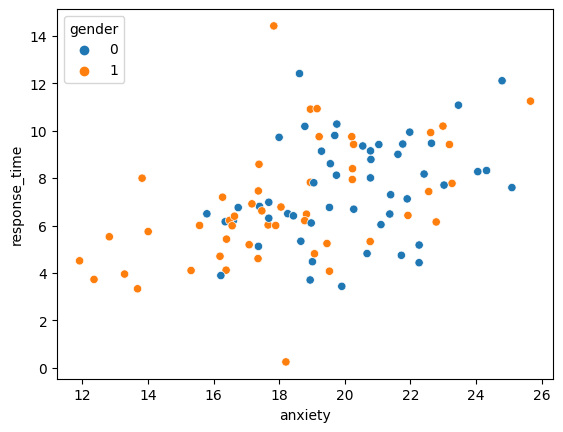

In [ ]:
"""
12. You learned sth very important in excercise 7. Now: transform the df
life_expectancy_df in this way, to easily draw plot 'Year' vs 'Life Expectancy'
for three countries from the life_expectancy_df in one line of code.

HINT: when searching, try other than google tools, e.g., ChatGPT
"""
import seaborn as sns

life_expectancy_df = pd.DataFrame({
    'Poland': np.random.randint(60,70, size=20),
    'France': np.random.randint(60,70, size=20),
    'Norway': np.random.randint(60,70, size=20),
    'Year': np.arange(2003, 2023, 1),
})

display(life_expectancy_df)

sns.lineplot(data=life_expectancy_df)

In [ ]:
"""
13. Now, let's come back to the df_RT_anxiety. Display mean and standard deviations
of response times and anxiety levels per gender along with 95% CI from the df_RT_anxiety
"""

##

In [ ]:
"""
14.Now imagine, that you are interested in relation between anxiety and response times,
and the differences in this relation between genders. Draw the plot that answere your
curosity. Below you can find the example of such a plot.
"""

#

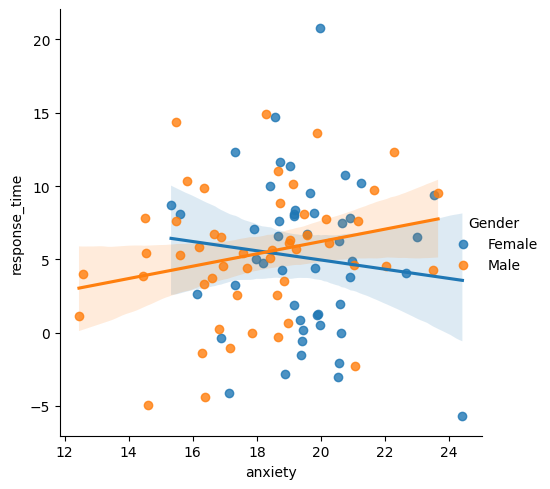

Those excercises that you didn't manage to do now, you can complete at home.

## Excercise 2:

Imagine, that you work for a company that implements a large platform to check the statistics of certain devices. The platform is BIG, and you work in the performance team, which is responsible for overseeing and improving the platform's performance. The platform has recently slowed down significantly. Using data with statistics from the platform, try to identify that place in the platform that you should looked at first.

HINT: Try to think about the answeres on following questions:
1. Is load (duration time of tasks) the same on all instalations?
2. Is load the same for all tasks, or some tasks use more resources than others?
3. Are there some locations that consume more time than others?
4. Are specific tasks comsume the same amount of resources at different installations?
5. Are there any differences in load for different locations in different tasks at different installations?



In [2]:
'''
Generates data - Please do not look into this piece of code.
'''

import pandas as pd
import random
from numpy.random import RandomState

# Number of records
n = 5000

# Number of locations, installations, and tasks
line_numbers = np.arange(0,20)
class_names = [
    'DataBaseConnector',
    'DataReader',
    'DataSaver',
    'DeviceConnector',
    'DeviceUpdater'
]

num_installations = 5
num_tasks = 10

# Create a list of locations, installations, and tasks
np.random.seed(42)
locations = [f"{np.random.choice(class_names)}:{np.random.choice(line_numbers)}" for _ in range(20)]
installations = [f'Installation {i}' for i in range(num_installations)]
tasks = [f'Task {i}' for i in range(num_tasks)]

# Create a list to store data for the DataFrame
data = []

prng = RandomState(1203489)
frequent_location = prng.choice(locations)
frequent_installation = prng.choice(installations)
frequent_task = prng.choice(tasks)

# Create the DataFrame
for _ in range(n):
    installation = prng.choice(installations)
    task = prng.choice(tasks)

    # Add more entries with the frequent locations for a specific task and installation
    if installation == frequent_installation and task == frequent_task:
        location = frequent_location
        duration = random.uniform(.2, 1.5)
    else:
        location = random.choice(locations)
        duration = random.uniform(1.0, 2.0)  # Regular duration

    data.append([location, installation, task, duration])

# Create the DataFrame
df = pd.DataFrame(data, columns=['location', 'installation', 'task number', 'duration'])

In [20]:
bd_statistics_df = df

###
df.sort_values('duration', ascending = False)

comb_stat0= df.groupby(['location','installation','task number'])['duration'].sum()
comb_stat0.sort_values(ascending=False)
comb_stat= df.groupby('location')['duration'].sum()
comb_stat.sort_values(ascending = False)

top_3_locations = comb_stat.head(3).index
df_top_3loc = df[df['location'].isin(top_3_locations)]
df_top_3loc.sort_values('duration', ascending = False)

# instal_most_problematic = df_top_3loc.groupby(['location','installation'])['duration'].sum()
# instal_most_problematic.sort_values(ascending = False)

selected_rows = []

for location, group_location in df_top_3loc.groupby('location'):
    top_3_installations = group_location.groupby('installation')['duration'].sum().nlargest(3).index
    for installation, group_installation in group_location[group_location['installation'].isin(top_3_installations)].groupby('installation'):
        average_duration = group_installation['duration'].mean()
        top_tasks = group_installation[group_installation['duration'] > average_duration].nlargest(3, columns='duration')
        selected_rows.extend(top_tasks.to_records())

# Creating a new DataFrame from the selected rows
df_top_3_locations_installations_tasks = pd.DataFrame.from_records(selected_rows)

print(df_top_3_locations_installations_tasks)



       0                     1               2       3         4
0    229  DataBaseConnector:13  Installation 0  Task 3  1.986695
1   2675  DataBaseConnector:13  Installation 0  Task 1  1.959573
2    666  DataBaseConnector:13  Installation 0  Task 4  1.949888
3   3313  DataBaseConnector:13  Installation 3  Task 7  1.982777
4   4333  DataBaseConnector:13  Installation 3  Task 3  1.972126
5   4468  DataBaseConnector:13  Installation 3  Task 6  1.965590
6   3888  DataBaseConnector:13  Installation 4  Task 2  1.996525
7   3653  DataBaseConnector:13  Installation 4  Task 6  1.971152
8   4155  DataBaseConnector:13  Installation 4  Task 6  1.954054
9   2368  DataBaseConnector:16  Installation 1  Task 8  1.982073
10   447  DataBaseConnector:16  Installation 1  Task 7  1.947215
11  3687  DataBaseConnector:16  Installation 1  Task 1  1.925600
12  2222  DataBaseConnector:16  Installation 2  Task 6  1.966628
13  4326  DataBaseConnector:16  Installation 2  Task 8  1.959721
14  4839  DataBaseConnect

## Excercise 3:
Imagine, that you work for a company that implements a large platform to check the statistics of certain devices. The platform is BIG, and you work in the performance team, which is responsible for overseeing and improving the platform's performance. The platform has had a few moments recently where it has slowed down. Using data with statistics from the platform, try to identify the problem.

HINT: Try to think about the answeres on following questions:
1. Is load (duration time of tasks) the same on all instalations?
2. Is load the same every day?
3. Are there specific periods when the platform use more resources?

In [ ]:
'''
Generates data - Please do not look into this piece of code.
'''
import pandas as pd
import numpy as np
import random

# Number of records
n = 5000

# Create a range of timestamps covering multiple days
start_date = pd.Timestamp('2023-01-01')
end_date = pd.Timestamp('2023-01-10')
date_range = pd.date_range(start=start_date, end=end_date, freq='H')

line_numbers = np.arange(0,20)
class_names = [
    'DataBaseConnector',
    'DataReader',
    'DataSaver',
    'DeviceConnector',
    'DeviceUpdater'
]

num_installations = 5
num_tasks = 10

# Create a list of locactions, installations, and tasks
np.random.seed(42)
locations = [f"{np.random.choice(class_names)}:{np.random.choice(line_numbers)}" for _ in range(20)]
installations = [f'Installation {i}' for i in range(num_installations)]
tasks = [f'Task {i}' for i in range(num_tasks)]

# Create a list to store data for the DataFrame
data = []

# Generate the DataFrame
for _ in range(n):
    timestamp = random.choice(date_range)
    location = random.choice(locations)
    installation = random.choice(installations)
    task = random.choice(tasks)

    if timestamp.hour == 0:
        data.extend([[timestamp, location, installation, task, random.uniform(1.5, 2.0)] for _ in range(2)])
    else:
        data.append([timestamp, location, installation, task, random.uniform(1.0, 2.0)])

# Create the DataFrame
df = pd.DataFrame(data, columns=['timestamp', 'location', 'installation', 'task number', 'duration'])

In [ ]:
bd_statistics_df = df
bd_statistics_df.head()

###

,timestamp,location,installation,task number,duration
0,2023-01-06 01:00:00,DataSaver:11,Installation 2,Task 2,1.651461
1,2023-01-03 15:00:00,DeviceUpdater:3,Installation 1,Task 9,1.479041
2,2023-01-07 15:00:00,DeviceConnector:15,Installation 1,Task 8,1.343630
3,2023-01-06 03:00:00,DataSaver:10,Installation 2,Task 3,1.277890
4,2023-01-04 14:00:00,DataSaver:7,Installation 3,Task 3,1.950171


## Homework